# MLPs
train model & save result

## Data
* data : v1-v4
* n_class : 2
* duration : 3
* sampling_rate : 1000
* n_samples : 1000 (500:500)
* heart_rate : random between 60 to 100
* noise : bw, mt, ac



In [1]:
import numpy as np
import pickle
import time
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow.keras as keras
import tensorflow as tf

import matplotlib.pyplot as plt


## Load Data


In [3]:
import os

os.environ["KAGGLE_USERNAME"] = "nnttch"
os.environ["KAGGLE_KEY"] = "a457b9ee75a8ae5612c0fd73416a8bac"

In [4]:
!pip -q uninstall kaggle
!pip -q install kaggle

Proceed (y/n)? y
     |████████████████████████████████| 61kB 4.5MB/s 


In [5]:
!kaggle datasets download nnttch/ecg-simulation

!unzip *.zip
!ls

100% 3.41G/3.41G [00:53<00:00, 68.8MB/s]
100% 3.41G/3.41G [00:53<00:00, 68.0MB/s]
Archive:  ecg-simulation.zip
  inflating: data/ecg5000.pkl        
  inflating: data/ecg_bw5000.pkl     
  inflating: data/ecg_gn5000.pkl     
  inflating: data/ecg_ma5000.pkl     
  inflating: data/ecgste5000.pkl     
  inflating: data/ecgste_bw5000.pkl  
  inflating: data/ecgste_gn5000.pkl  
  inflating: data/ecgste_ma5000.pkl  
data  ecg-simulation.zip  sample_data


In [6]:
def load_data(file_name):
  filehandler = open(file_name, 'rb')
  data = pickle.load(filehandler)
  filehandler.close()
  return data


In [7]:
# none
ecg5000 = load_data('data/ecg5000.pkl')
ecg5000['label'] = 0
ecgste5000 = load_data('data/ecgste5000.pkl')
ecgste5000['label'] = 1
df = pd.concat([ecg5000, ecgste5000], axis=0)

# bw
ecg_bw5000 = load_data('data/ecg_bw5000.pkl')
ecg_bw5000['label'] = 0
ecgste_bw5000 = load_data('data/ecgste_bw5000.pkl')
ecgste_bw5000['label'] = 1
df_bw = pd.concat([ecg_bw5000, ecgste_bw5000], axis=0)

# ma
ecg_ma5000 = load_data('data/ecg_ma5000.pkl')
ecg_ma5000['label'] = 0
ecgste_ma5000 = load_data('data/ecgste_ma5000.pkl')
ecgste_ma5000['label'] = 1
df_ma = pd.concat([ecg_ma5000, ecgste_ma5000], axis=0)

# gn
ecg_gn5000 = load_data('data/ecg_gn5000.pkl')
ecg_gn5000['label'] = 0
ecgste_gn5000 = load_data('data/ecgste_gn5000.pkl')
ecgste_gn5000['label'] = 1
df_gn = pd.concat([ecg_gn5000, ecgste_gn5000], axis=0)


In [9]:
print(df.shape)
print(df_bw.shape)
print(df_ma.shape)
print(df_gn.shape)

(10000, 6)
(10000, 6)
(10000, 6)
(10000, 6)


## Preprocessing

In [10]:
# data preprocessing
def get_input(df):
  '''
    preprocessing data from DataFrame to feed into Neural Network
    the input dimensions should be (m, tx, nx)
    m: number of samples
    tx: number of time points
    nx: number of features
  '''

  data = []
  for i in range(df.shape[0]):
    smp_data = np.vstack(df[['v1', 'v2', 'v3', 'v4']].values[i]).T
    data.append(smp_data)

  X = np.array(data)
  y = df['label']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)
  
  print("Train set: {}".format(X_train.shape))
  print("Test set : {}".format(X_test.shape))

  return X_train, X_test, y_train, y_test


## Train & Save Models
save model, training history, duration
* mlp_df
* mlp_dfbw
* mlp_dfma
* mlp_dfac

In [ ]:
# MLP 
def build_model(input_shape, nb_classes):

  input_layer = keras.layers.Input(input_shape)

  # flatten/reshape because when multivariate all should be on the same axis 
  input_layer_flattened = keras.layers.Flatten()(input_layer)

  layer_1 = keras.layers.Dropout(0.1)(input_layer_flattened)
  layer_1 = keras.layers.Dense(500, activation='relu')(layer_1)

  layer_2 = keras.layers.Dropout(0.2)(layer_1)
  layer_2 = keras.layers.Dense(500, activation='relu')(layer_2)

  layer_3 = keras.layers.Dropout(0.2)(layer_2)
  layer_3 = keras.layers.Dense(500, activation='relu')(layer_3)

  output_layer = keras.layers.Dropout(0.3)(layer_3)
  output_layer = keras.layers.Dense(nb_classes, activation='sigmoid')(output_layer)

  model = keras.models.Model(inputs=input_layer, outputs=output_layer)

  model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])
  
  return model


### mlp_df

In [13]:
# get_input
X_train, X_test, y_train, y_test = get_input(df)

# model
input_shape = X_train.shape[1:]
nb_classes = 1

batch_size = 16
nb_epochs = 10 #5000

mlp_df = build_model(input_shape, nb_classes)

start_time = time.time()
history = mlp_df.fit(X_train, y_train, validation_split=0.30, 
                     epochs=nb_epochs, batch_size=batch_size, verbose=0)
duration = time.time() - start_time

mlp_df.summary()

Train set: (8000, 3000, 4)
Test set : (2000, 3000, 4)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3000, 4)]         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               6000500   
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropo

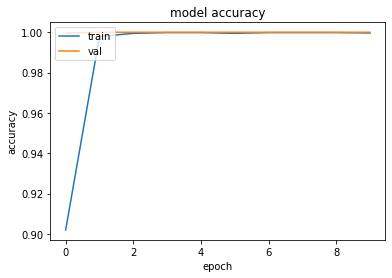

In [14]:
# history of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

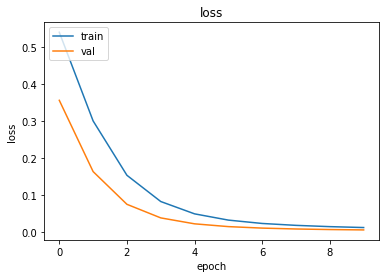

In [15]:
# history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
len(mlp_df.get_weights())

8

In [19]:
print("duration : {} seconds".format(duration))

duration : 118.97624707221985 seconds


In [20]:
# save model
mlp_df.save('mlp_df.hdf5')

In [ ]:
# load model
# model = keras.models.load_model('mlp_df.hdf5')

# y_pred = model.predict(X_test)


In [ ]:
# tmp = y_pred > 0.5
# tmp.astype('int')

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

### mlp_dfbw

In [21]:
# get_input
X_train, X_test, y_train, y_test = get_input(df_bw)

# model
input_shape = X_train.shape[1:]
nb_classes = 1

batch_size = 16
nb_epochs = 10 #5000

mlp_dfbw = build_model(input_shape, nb_classes)

start_time = time.time()
history = mlp_dfbw.fit(X_train, y_train, validation_split=0.30, 
                       epochs=nb_epochs, batch_size=batch_size, verbose=0)
duration = time.time() - start_time

mlp_dfbw.summary()

Train set: (8000, 3000, 4)
Test set : (2000, 3000, 4)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3000, 4)]         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               6000500   
_________________________________________________________________
dropout_9 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropo

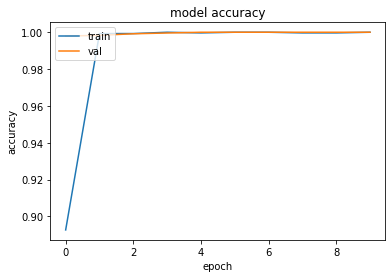

In [22]:
# history of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

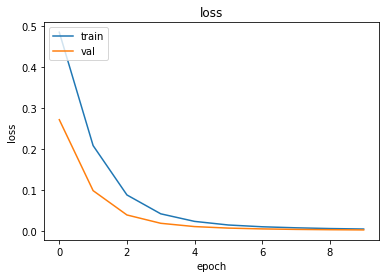

In [23]:
# history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
len(mlp_dfbw.get_weights())

8

In [24]:
print("duration : {} seconds".format(duration))

duration : 118.5005350112915 seconds


In [28]:
# save model
mlp_dfbw.save('mlp_dfbw.hdf5')

### mlp_dfma

In [30]:
# get_input
X_train, X_test, y_train, y_test = get_input(df_ma)

# model
input_shape = X_train.shape[1:]
nb_classes = 1

batch_size = 16
nb_epochs = 10 #5000

mlp_dfma = build_model(input_shape, nb_classes)

start_time = time.time()
history = mlp_dfma.fit(X_train, y_train, validation_split=0.30, 
                       epochs=nb_epochs, batch_size=batch_size, verbose=0)
duration = time.time() - start_time

mlp_dfma.summary()

Train set: (8000, 3000, 4)
Test set : (2000, 3000, 4)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3000, 4)]         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               6000500   
_________________________________________________________________
dropout_13 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropo

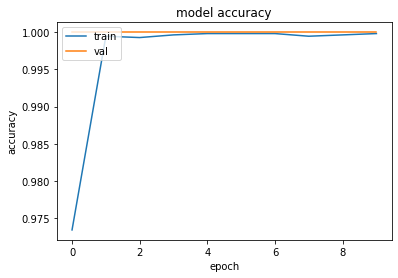

In [31]:
# history of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

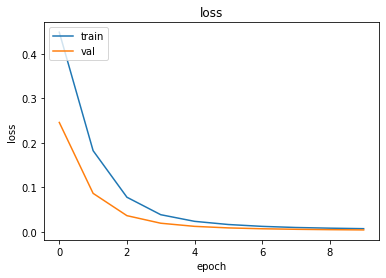

In [32]:
# history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
print("duration : {} seconds".format(duration))

duration : 123.48603224754333 seconds


In [34]:
# save model
mlp_dfma.save('mlp_dfma.hdf5')

### mlp_dfgn

In [35]:
# get_input
X_train, X_test, y_train, y_test = get_input(df_gn)

# model
input_shape = X_train.shape[1:]
nb_classes = 1

batch_size = 16
nb_epochs = 10 #5000

mlp_dfgn = build_model(input_shape, nb_classes)

start_time = time.time()
history = mlp_dfgn.fit(X_train, y_train, validation_split=0.30, 
                       epochs=nb_epochs, batch_size=batch_size, verbose=0)
duration = time.time() - start_time

mlp_dfgn.summary()

Train set: (8000, 3000, 4)
Test set : (2000, 3000, 4)
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3000, 4)]         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12000)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 500)               6000500   
_________________________________________________________________
dropout_17 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropo

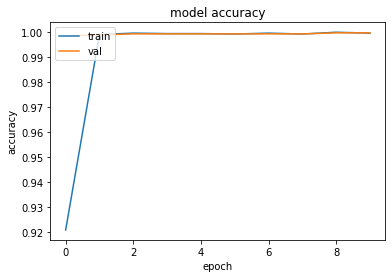

In [36]:
# history of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

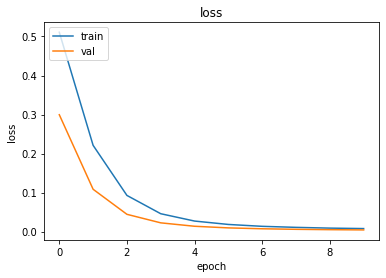

In [37]:
# history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
print("duration : {} seconds".format(duration))

duration : 121.20092439651489 seconds


In [39]:
# save model
mlp_dfgn.save('mlp_dfgn.hdf5')